First five rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Class distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


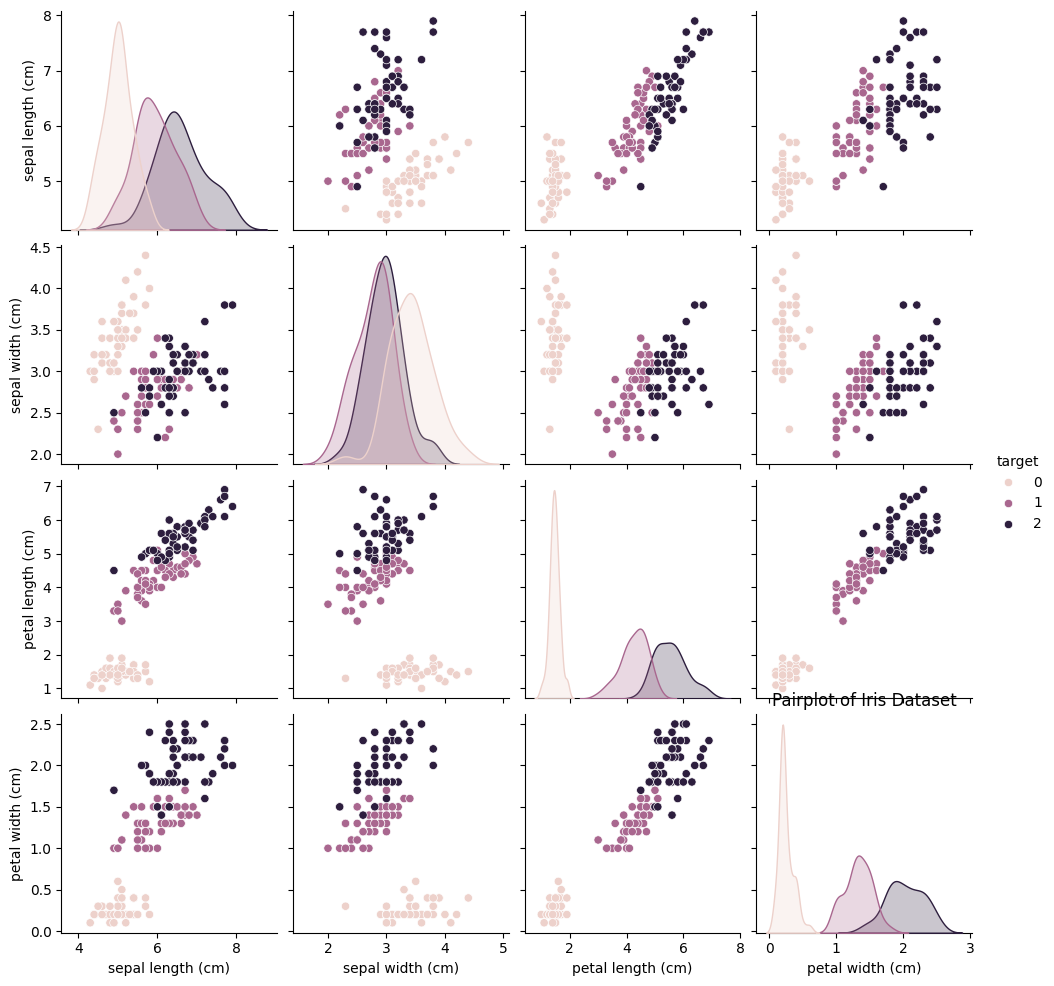

Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Accuracy Score: 0.8888888888888888


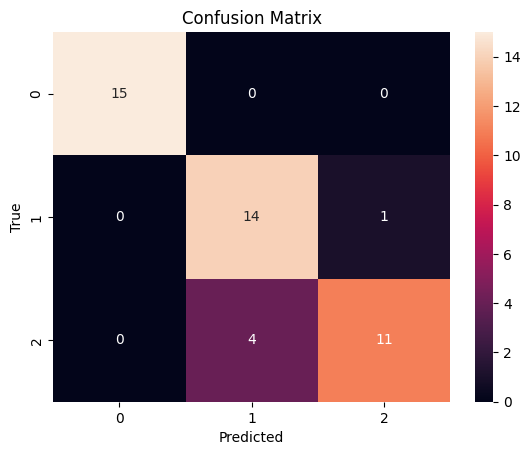

Model saved as 'iris_random_forest_model.pkl'


In [2]:
# Task 2: Build a Machine Learning Model (Intermediate Task)
# Dataset: Iris Dataset
# Model: Random Forest Classifier

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Step 2: Load Dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Step 3: Data Exploration
print("First five rows:")
print(df.head())

print("\nClass distribution:")
print(df['target'].value_counts())

# Optional visualization
sns.pairplot(df, hue='target')
plt.title("Pairplot of Iris Dataset")
plt.show()

# Step 4: Preprocessing
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Model Training and Hyperparameter Tuning
params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid.best_params_)

# Step 6: Evaluation
y_pred = grid.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 7: Save Model
joblib.dump(grid.best_estimator_, "iris_random_forest_model.pkl")
print("Model saved as 'iris_random_forest_model.pkl'")
